# Automated Grading/Plagarism

## Download Packages (Optional)

In [1]:
"""
This section will be used to download all python packages needed for this code to run. If the packages are already installed then you can leave this blank.
"""

#!pip install jellyfish
#!pip install strsimpy
#!pip install sklearn
#!pip install nltk
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install tensorflow

'\nThis section will be used to download all python packages needed for this code to run. If the packages are already installed then you can leave this blank.\n'

## Import Packages for Jupyter Notebook

In [2]:
"""
These are all the packages used in this application.
"""

import csv
import nltk
import pandas
import sklearn
import numpy
import pandas
import matplotlib.pyplot as mplt
from itertools import combinations
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

## Read Data from TSV

In [3]:
"""
This section will download the training data and transform into a list of dictionaries for all data
"""

# set training data file name
data_file = 'training_set_rel3.csv'

# open data file and set as a file object
with open(data_file, 'r', encoding='utf-8') as raw_obf:
    raw_data_no_form = csv.reader(raw_obf) # read data
    raw_data_list = list(raw_data_no_form) # transform into a list
    raw_data_list.pop(0) # remove headers

    essay_list = [] # set list to hold essays

    # loop and create a list of dictionaries
    for row_col in raw_data_list:
        new_dict = { "essay_id": row_col[0], "essay_set": row_col[1], "essay": row_col[2],'essay_stemmed':'', "domain1_score": row_col[3], "domain2_score": row_col[4], "unique_words": 0, "avg_words": 0, "filler_words": 0, "avg_domain": 0,}
        essay_list.append(new_dict) # append dict to list
    #print(essay_list[0])

## Preprocessing Data

In [4]:
"""
This section will be used to preprocess data
- Lower All Characters
- Portstem all words
- Assign new column for data
"""

# loop through all data and set
for row in essay_list:
    essay_txt = row['essay'] # place string into a variable
    essay_txt = essay_txt.lower() # lower all characters
    essay_words = nltk.word_tokenize(essay_txt) # tokenize

    temp_list = []

    # Port stem and add words to a column of dataset
    for word in essay_words:
        temp_list.append(PorterStemmer().stem(word)) # portstem and append list
    row.update({'essay': essay_txt, 'essay_stemmed': temp_list}) # assign new column and data to row

In [5]:
"""
Normalize scores to a percentage ratio based on maximum and minimum values for grading in the future
"""

# Normalize Domain Scores
def normalize_domain_scores(x, maxval, minval):
    x = abs(int(x)) # make all values real
    new_score = (int(x)-minval)/(maxval-minval) # normalize formula
    new_score *= 100
    return new_score

# loop all essays and based on essay set normalize based on specific criteria
for row in essay_list:
    if row['essay_set'] == '1':
        max_val, min_val = 12, 2
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
    elif row['essay_set'] == '2':
        max_val, min_val = 6, 1
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
        row['domain2_score'] = normalize_domain_scores(int(row['domain2_score']), 4,1)
    elif row['essay_set'] == '3':
        max_val, min_val = 3, 0
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
    elif row['essay_set'] == '4':
        #print(row['essay_id'])
        max_val, min_val = 3, 0
        row['domain1_score'] = normalize_domain_scores(row['domain1_score'], max_val, min_val)
    elif row['essay_set'] == '5':
        max_val, min_val = 4, 0
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
    elif row['essay_set'] == '6':
        max_val, min_val = 4, 0
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
    elif row['essay_set'] == '7':
        max_val, min_val = 30, 0
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)
    elif row['essay_set'] == '8':
        max_val, min_val = 60, 0
        row['domain1_score'] = normalize_domain_scores(int(row['domain1_score']), max_val, min_val)


In [6]:
"""
Convert data to dataframe for future use
"""

# Place Essays and Domain Scores into lists for models
train_df = pandas.DataFrame(essay_list)
train_df.head(3)

,essay_id,essay_set,essay,essay_stemmed,domain1_score,domain2_score,unique_words,avg_words,filler_words,avg_domain
0,1,1,"dear local newspaper, i think effects computer...","[dear, local, newspap, ,, i, think, effect, co...",60.0,,0,0,0,0
1,2,1,"dear @caps1 @caps2, i believe that using compu...","[dear, @, caps1, @, caps2, ,, i, believ, that,...",70.0,,0,0,0,0
2,3,1,"dear, @caps1 @caps2 @caps3 more and more peopl...","[dear, ,, @, caps1, @, caps2, @, caps3, more, ...",50.0,,0,0,0,0


## Extract Features from Dataset

In [7]:
"""
Set values for feature extraction
"""

# declare average variables
avg_of_uniq_words = 0
avg_of_words = 0
avg_of_filler_words = 0

In [8]:
"""
Find the number of unique words in the essay used
"""
# calculate the average unique words
for row in essay_list:
    essay_txt = row['essay']
    temp_essay_list = essay_txt.split(' ')
    num_of_uniq_words = len(Counter(temp_essay_list))
    row['unique_words'] = num_of_uniq_words
    avg_of_uniq_words = avg_of_uniq_words + num_of_uniq_words
avg_of_uniq_words = avg_of_uniq_words / len(essay_list)
print('completed unique words')

completed unique words


In [9]:
"""
Find the number of words in each essay
"""

# calculate the word count in each essay
for row in essay_list:
    essay_txt = row['essay']
    temp_list = essay_txt.split(' ')
    num_of_words = len(temp_list)
    row['avg_words'] = num_of_words
    avg_of_words = avg_of_words + num_of_words
avg_of_words = avg_of_words / len(essay_list)
print('completed word count')

completed word count


In [10]:
"""
Find the number of stopwords each essay
"""

# calculate number of stopwords/filler words
for row in essay_list:
    essay_txt = row['essay']
    temp_tokens = word_tokenize(essay_txt)
    stopwords_x = [w for w in temp_tokens if w in sw.words('English')]
    row['filler_words'] = len(stopwords_x)
    avg_of_filler_words = avg_of_filler_words + len(stopwords_x)
avg_of_filler_words = avg_of_filler_words / len(essay_list)
print('completed filler words')

completed filler words


In [11]:
"""
Calculate the domain score for the essays
"""

# calculate Domain score
for row in essay_list:
    avg_domain_score = 0
    domains_added = 0

    if row['domain1_score'] != '':
        avg_domain_score += int(row['domain1_score'])
        domains_added += 1

    if row['domain2_score'] != '':
        avg_domain_score += int(row['domain2_score'])
        domains_added += 1
    if domains_added > 0:
        row['avg_domain'] = avg_domain_score / domains_added
    else:
        print(row)
        row['avg_domain'] = 0
print('completed domain scores')

completed domain scores


# Plot Feature Extraction Results

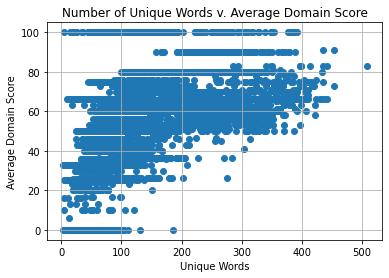

In [12]:
"""
Plot Unique Value Feature extraction vs grade
"""

# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['unique_words'])
    y_values.append(row['avg_domain'])

#plot unique words
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Unique Words v. Average Domain Score')
mplt.xlabel('Unique Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

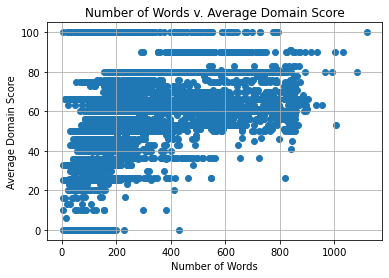

In [13]:
"""
Plot Word Count Feature extraction vs grade
"""

# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['avg_words'])
    y_values.append(row['avg_domain'])

#plot Word Count
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Words v. Average Domain Score')
mplt.xlabel('Number of Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

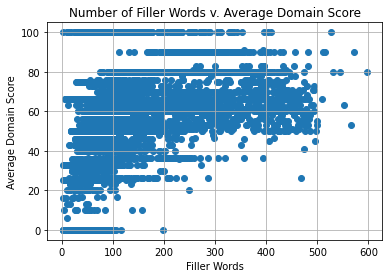

In [14]:
"""
Plot Stopwords Count Feature extraction vs grade
"""

# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['filler_words'])
    y_values.append(row['avg_domain'])

#plot unique words
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Filler Words v. Average Domain Score')
mplt.xlabel('Filler Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

## Train Model

In [15]:
"""
Import Test data for the TFIDF Vectorizer
"""

# Prep Test Data
with open('test_set.csv', 'r', encoding='utf-8') as test_file:
    raw_test_data = csv.reader(test_file)
    test_data_list = list(raw_test_data)
    test_data_list.pop(0)
    test_list = []
    for row in test_data_list:
        #print(len(row))
        new_test_dict = {
            "essay_id": row[0],	"essay_set": row[1], "essay": row[2]
        }
        test_list.append(new_test_dict)

In [16]:
"""
Process data to lower all strings
"""

#Prepcrocess Test Data
for row in test_list:
    test_txt = row['essay']
    test_txt = test_txt.lower()
    row['essay'] = test_txt

test_df = pandas.DataFrame(test_list)

In [17]:
"""
Create a TFIDF Vector for all data
"""

from sklearn.feature_extraction.text import TfidfVectorizer
essays_tfidf = []
essays_tfidf = train_df['essay'].tolist() + test_df['essay'].tolist()

train_tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))

essay_vectorizer = train_tfidf.fit_transform(essays_tfidf).toarray()
essay_vectorizer = numpy.asarray(essay_vectorizer, dtype=float)

scores = numpy.asarray(train_df['avg_domain'], dtype=float)

In [18]:
#SVR Regression
#svr_reg = sklearn.svm.SVR(verbose=10)
#svr_reg.fit(essay_vectorizer, scores)
print(len(essay_vectorizer))
print(len(scores))
print(len(essays_tfidf))

17232
12978
17232


In [26]:
from sklearn.neural_network import MLPRegressor
#Neural Network
nn_reg = MLPRegressor(verbose=True, solver='adam', early_stopping=True, validation_fraction=0.3, n_iter_no_change=5, max_iter=100)
nn_reg.fit(essay_vectorizer[:12978], scores)

Iteration 1, loss = 0.00096784
Validation score: 0.000000
Iteration 2, loss = 0.00075941
Validation score: 0.000000
Iteration 3, loss = 0.00019582
Validation score: 0.000000
Iteration 4, loss = 0.00006585
Validation score: 0.000000
Iteration 5, loss = 0.00004481
Validation score: 0.000000
Iteration 6, loss = 0.00003544
Validation score: 0.000000
Iteration 7, loss = 0.00003246
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


MLPRegressor(early_stopping=True, max_iter=100, n_iter_no_change=5,
             validation_fraction=0.3, verbose=True)

# Test Models

In [27]:
#Neural Network
nn_predicted = nn_reg.predict(essay_vectorizer[12978:])

# Plagiarism Checker

In [28]:
"""
from sklearn.metrics.pairwise import cosine_similarity
tfidf_list = essay_vectorizer[12978:]

sim_list = []
for id in test_df['essay_id']:
    sim_list.append({"essay_id": id})

print(len(sim_list))
print(len(tfidf_list))
for idf in range(len(tfidf_list)):
    sim_list[idf].update({"tfidf": tfidf_list[idf]})
"""

'\nfrom sklearn.metrics.pairwise import cosine_similarity\ntfidf_list = essay_vectorizer[12978:]\n\nsim_list = []\nfor id in test_df[\'essay_id\']:\n    sim_list.append({"essay_id": id})\n\nprint(len(sim_list))\nprint(len(tfidf_list))\nfor idf in range(len(tfidf_list)):\n    sim_list[idf].update({"tfidf": tfidf_list[idf]})\n'

In [29]:
"""
def similarity(vec1, vec2):
    vec1 = numpy.array(vec1)
    vec2 = numpy.array(vec2)
    return numpy.dot(vec1, vec2) / (numpy.sqrt(numpy.sum(vec1**2)) * numpy.sqrt(numpy.sum(vec2**2)))

print(sim_list)
comparison_list = list(combinations(sim_list, 2))
similarity_results = []
print(comparison_list[:10])
for compare_similarity in comparison_list:
    new_comp_dict = {
        "EssayID_1": compare_similarity[0]['essay_id'],
        "EssayID_2": compare_similarity[1]['essay_id'],
        "Similarity": similarity(compare_similarity[0]['tfidf'], compare_similarity[1]['tfidf'])
    }
    similarity_results.append(new_comp_dict)
"""

'\ndef similarity(vec1, vec2):\n    vec1 = numpy.array(vec1)\n    vec2 = numpy.array(vec2)\n    return numpy.dot(vec1, vec2) / (numpy.sqrt(numpy.sum(vec1**2)) * numpy.sqrt(numpy.sum(vec2**2)))\n\nprint(sim_list)\ncomparison_list = list(combinations(sim_list, 2))\nsimilarity_results = []\nprint(comparison_list[:10])\nfor compare_similarity in comparison_list:\n    new_comp_dict = {\n        "EssayID_1": compare_similarity[0][\'essay_id\'],\n        "EssayID_2": compare_similarity[1][\'essay_id\'],\n        "Similarity": similarity(compare_similarity[0][\'tfidf\'], compare_similarity[1][\'tfidf\'])\n    }\n    similarity_results.append(new_comp_dict)\n'

## Export List

In [30]:
fields = ["essay_id","Neural_Network"]

export_list = []

for row in test_df['essay_id']:
    new_export_dict = {
        "essay_id": row,
        "Neural_Network": 0,
    }
    export_list.append(new_export_dict)

for idx in range(len(nn_predicted)):
    export_list[idx].update({"Neural_Network": nn_predicted[idx]})

with open('test_results.csv', 'w', encoding='utf-8') as export_tests:
    file_writer = csv.DictWriter(export_tests, fieldnames=fields)
    file_writer.writeheader()
    file_writer.writerows(export_list)
    print("Grading Complete")

Grading Complete


In [ ]:
"""
fields = ["EssayID_1","EssayID_1","Similarity"]
with open('similarity_results.csv', 'w', encoding='utf-8') as export_similarities:
    file_writer = csv.DictWriter(similarity_results)
    file_writer.writeheader()
    file_writer.writerows()
"""